# Bootstrapping the M-$\sigma$ relation

:::{admonition} [Yasmeen Asali](https://orcid.org/0000-0002-8320-2198),[Imad Pasha](https://orcid.org/0000-0002-7075-9931), [William Cerny](https://orcid.org/0000-0003-1697-7062), [Sebastian Monzon](https://orcid.org/0000-0002-9986-4604) (Yale University)
:class: Author

*Description*: Learn about bootstrap resampling while fitting the supermassive black hole M-$\sigma$ relation

*Intended Audience*: Beginner Undergraduate

*tags*: `libraries:numpy`, `model-fitting`, 

*Requirements*: [requirements.txt](./requirements.txt)

*Last Updated: August 9, 2024*
:::

:::{admonition} Learning Objectives
:class: learningobjective 

1. Be able to apply bootstrap resampling in the context of model fitting.
2. Understand the limitations of linear least squares when data have uncertainties in both directions

:::


## Introduction

The M-sigma relation, also known as the black hole mass-velocity dispersion relation, is an empirical correlation observed between the mass of supermassive black holes ($M_{bh}$) at the centers of galaxies and the velocity dispersion ($\sigma$) of stars in the bulges of those galaxies. This relationship suggests that there is a tight connection between the properties of galaxies and the central black holes they host. Specifically, galaxies with larger velocity dispersions tend to harbor more massive black holes at their centers.

The M-$\sigma$ relation has profound implications for our understanding of galaxy formation and evolution, as well as the co-evolution of galaxies and their central black holes. It provides valuable insights into the mechanisms governing the growth and regulation of supermassive black holes, the role of feedback processes in galaxy evolution, and the relationship between the properties of galactic bulges and their central black holes.

### Loading the data

We'll begin by loading some measurements of black hole mass (`M_bh`) and bulge velocity dispersion (`sigma`) for a set of nearby galaxies. 

:::{exercise}
:class: dropdown 

Use the `pandas` library to load the `m-sigma.txt` file into a `DataFrame` (download [here](./m-sigma.txt)); it should read in with headings automatically.

:::

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('m-sigma.txt')
df

,Galaxy,M_bh,sigma,sigma_err,M_bh_err
0,MW,2.950000e+06,100,20,3.500000e+05
1,I1459,4.600000e+08,312,41,2.800000e+08
2,N221,3.900000e+06,76,10,9.000000e+05
3,N3115,9.200000e+08,278,36,3.000000e+08
4,N3379,1.350000e+08,201,26,7.300000e+07
5,N4258,3.900000e+07,138,18,3.400000e+06
6,N4261,5.400000e+08,290,38,1.200000e+08
7,N4342,3.300000e+08,261,34,1.900000e+08
8,N4374,1.700000e+09,286,37,1.200000e+09
9,N4486,3.570000e+09,345,45,1.020000e+09


The relation is typically plotted with the black hole masses in `log` form. Let's add two columns to 

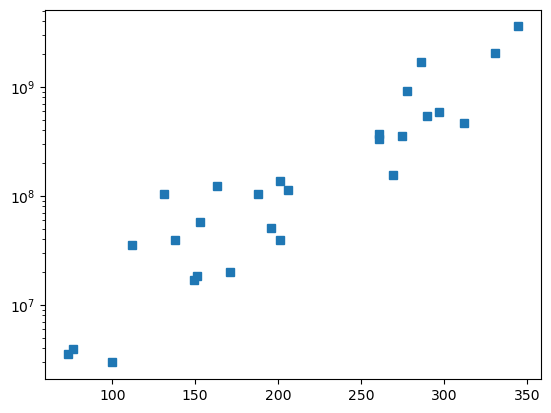

In [2]:
plt.plot(df.sigma,df.M_bh,'s')
plt.yscale('log')



In [3]:
log_BH = np.log10(df.M_bh)
BH_err = df.M_bh_err # note: we have already converted the errors to logspace for you! 

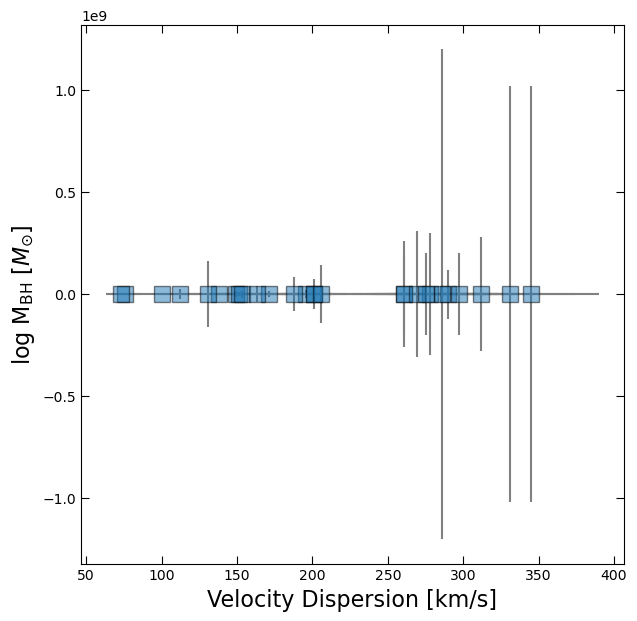

In [4]:
fig, ax = plt.subplots(figsize=(7,7))
ax.errorbar(df.sigma, log_BH, yerr=BH_err, xerr=df.sigma_err, fmt='None', color='gray')
ax.plot(df.sigma, log_BH, 's', color='C0', ms=12, alpha=0.5, mec='k')
ax.set_xlabel('Velocity Dispersion [km/s]', fontsize=16)
ax.tick_params(which='both', top=True, right=True, direction='in', length=6)
ax.set_ylabel(r'log M$_{\rm BH}$ [$M_{\odot}$]', fontsize=16);

Last time, we showed you how you could use `np.polyfit` to fit a line. The code we used to do this looked like:
```
# Fit a straight line (polynomial of degree 1) to the data
coefficients = np.polyfit(x, y, deg=1)

# For a first order polynomial, there are two coefficients
# Extract the slope (m) and intercept (b) from the coefficients
slope, intercept = coefficients 

# Generate points along the fitted line for plotting
x_fit = np.linspace(min(x), max(x), 100)
y_fit = slope * x_fit + intercept
```

We can do this more efficiently using the `np.polyval` function to generate `y_fit` without needing to write out the equation y = mx + b. 

In [5]:
coefficients = np.polyfit(df.sigma,log_BH,deg=1,w=1/BH_err)
x_fit = np.linspace(50,400,100)
y_fit = np.polyval(coefficients, x_fit)

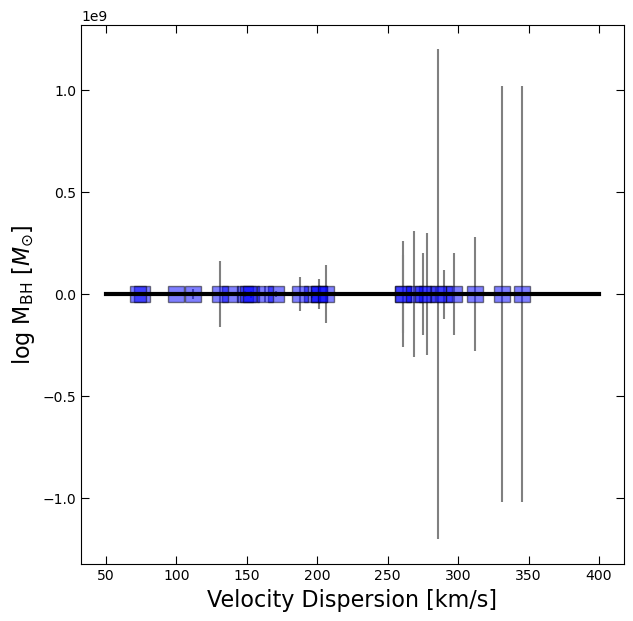

In [6]:
fig, ax = plt.subplots(figsize=(7,7))
ax.errorbar(df.sigma, log_BH, yerr=BH_err, xerr=df.sigma_err, fmt='None', color='gray')
ax.plot(df.sigma, log_BH, 's', color='blue', ms=12, alpha=0.5, mec='k')
ax.plot(x_fit, y_fit, 'k', lw=3)
ax.set_xlabel('Velocity Dispersion [km/s]', fontsize=16)
ax.tick_params(which='both', top=True, right=True, direction='in', length=6)
ax.set_ylabel(r'log M$_{\rm BH}$ [$M_{\odot}$]', fontsize=16);

### Fitting x(y) 

We also discussed how linear least squares is only accounting for the uncertainties in the independent variable (here our $y$-axis). But both quantities being plotted had major uncertainties, so we asked you to fit x(y) as well, using the errors on x instead of y. The solution to that attempt is below.

In [7]:
coeff2 = np.polyfit(log_BH,df.sigma,deg=1,w=1/df.sigma_err)
in_masses = np.linspace(-1.5,2,100)
out_velocities = np.polyval(coeff2,in_masses)

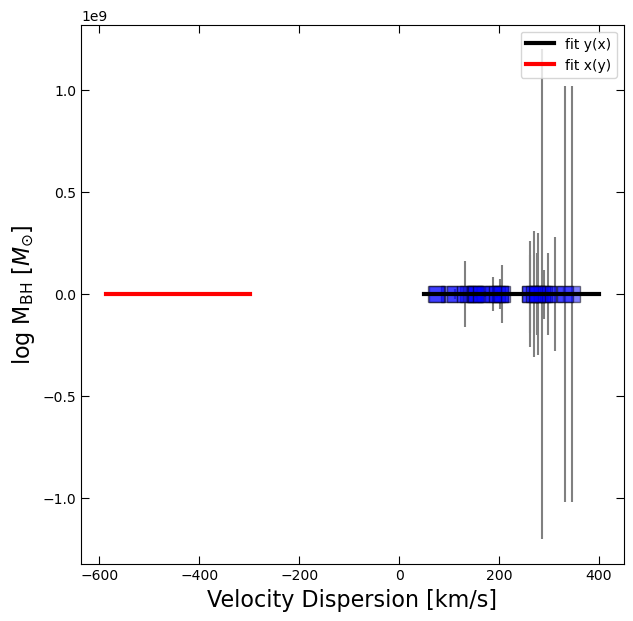

In [8]:
fig, ax = plt.subplots(figsize=(7,7))
ax.errorbar(df.sigma, log_BH, yerr=BH_err, xerr=df.sigma_err, fmt='None', color='gray')
ax.plot(df.sigma, log_BH, 's', color='blue', ms=12, alpha=0.5, mec='k')
ax.plot(x_fit, y_fit, 'k', lw=3, label='fit y(x)')
ax.plot(out_velocities, in_masses, 'r', lw=3, label='fit x(y)')
ax.set_xlabel('Velocity Dispersion [km/s]', fontsize=16)
ax.tick_params(which='both', top=True, right=True, direction='in', length=6)
ax.legend()
ax.set_ylabel(r'log M$_{\rm BH}$ [$M_{\odot}$]', fontsize=16);

## Bootstrap Resampling 

Bootstrapping is a resampling technique used in statistics to estimate the sampling distribution of a statistic by repeatedly sampling with replacement from the observed data. It is particularly useful when the underlying population distribution is unknown or difficult to model. 

1. Sample Creation: Bootstrapping starts with the creation of multiple bootstrap samples by randomly selecting observations from the original dataset with replacement. This means that each observation in the original dataset has the same chance of being selected for each bootstrap sample, and some observations may be selected multiple times while others may not be selected at all.
2. Statistical Estimation: After creating the bootstrap samples, the statistic of interest (e.g., mean, median, standard deviation, regression coefficient) is calculated for each bootstrap sample. This results in a distribution of the statistic across the bootstrap samples, known as the bootstrap distribution. In our case, this would be fitting our line to the data and seeing how much the paramters (slope and intercept) change for each fit. Now, we have some way of expressing uncertainty in our fitted parameters! 

The goal for today is to use bootstrapping to estimate the uncertainty on our fit for the M-sigma relation! 

![bootstrapping_image](bootstrap_resampling.png)

::::{admonition} Exercise 1: Bootstrap Resampling for our Linear Fit to the M-sigma Relation
:class: tip

Using your code from Monday, start by loading the data and fitting a linear model. 

1. **Perform Bootstrap Resampling:** To do this, you will re-fit the data many times after creating subsamples of
randomly drawn datasets (**with replacement**) from our actual data. In general, you can choose the number of bootstrap samples to generate based on computational resources and desired precision. For this case, you can start by generating ~500 bootstrap samples. For each bootstrap iteration: 
    - Generate a bootstrap sample from the observed data by randomly sampling with replacement N points from the data where N is the length of the data. Remember: you need to sample x, y, and yerr in some way that preserves the correct ordering (aka you can't take the black hole mass of one galaxy and the diserpersion of another galaxy!). There is a numpy function that can do this for you, so your first task is to search for this function!
    :::{hint} Hint
    :class: dropdown
    If you can't find it, the function you should use for this step is `np.random.choice`. Look at the documentation to figure out how to implement it. 
    :::
    - For each bootstrap sample, fit a linear model to the resampled data using the same procedure as before (first order polynomial with `np.polyfit`).
    - Append the coefficients (slope and intercept) of the linear fit for each bootstrap sample to a container of your choice (probably a list or array). 
2. **Visualize Results:** You should generate some plots to assess our bootstrapping results. 
    - First, add all 500 lines from your 500 bootstrap fits to your original M-sigma plot. Note: use a low `alpha` for your plots so the lines are semi-transparent! 
    - Plot histograms or density plots of the distributions of slopes and intercepts obtained from the bootstrap resampling. Additionally, overlay the slope and intercept derived from the original linear fit on the same plot for comparison.
3. **Evaluate and Interpret:** Examine the distribution of slopes and intercepts across the bootstrap samples to assess their variability and uncertainty. How well-constrained is our fit to the M-sigma relation on the basis of this data? 
:::: 